In [ ]:
import kagglehub

datapath = kagglehub.dataset_download("waalbannyantudre/hate-speech-detection-curated-dataset")
print("Path to dataset: ", datapath)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
datapath = "C:\\Users\\subin\\.cache\\kagglehub\\datasets\\waalbannyantudre\\hate-speech-detection-curated-dataset\\versions\\1"

In [4]:
df = pd.read_csv(Path(datapath, "tweet_hate-speech.csv"))

In [5]:
df.head()

,Content,Label,Content_int
0,denial of normal the con be asked to comment o...,1,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,..."
1,just by being able to tweet this insufferable ...,1,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22..."
2,that is retarded you too cute to be single tha...,1,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,..."
3,thought of a real badass mongol style declarat...,1,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,..."
4,afro american basho,1,"[146715, 46, 47, 48, 146714]"


In [6]:
df.shape

(440906, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440906 entries, 0 to 440905
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Content      440906 non-null  object
 1   Label        440906 non-null  object
 2   Content_int  440906 non-null  object
dtypes: object(3)
memory usage: 10.1+ MB


In [8]:
df.drop(columns='Content_int', axis=1, inplace=True)

In [9]:
df['Label'].value_counts()

Label
0        361594
1         79305
Label         7
Name: count, dtype: int64

In [10]:
df = df[df['Label']!='Label']

In [11]:
df['Label'] = df['Label'].astype(int)

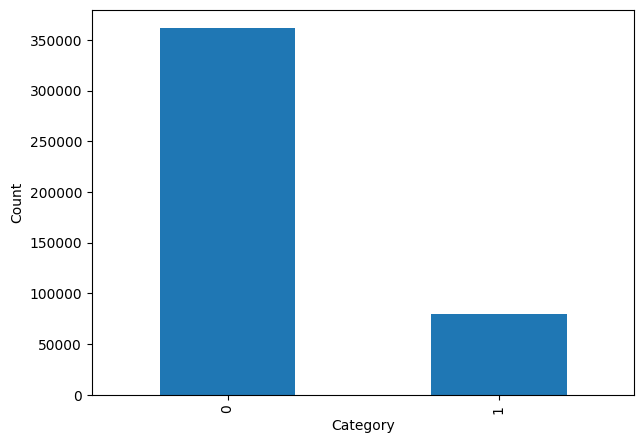

In [12]:
labels_count = df['Label'].value_counts()
plt.figure(figsize=(7,5))
labels_count.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [13]:
subset_hate_df = df[df['Label']==1].sample(n=60000, random_state=42)
subset_nornal_df = df[df['Label']==0].sample(n=60000, random_state=42)

In [14]:
subset_df = pd.concat([subset_hate_df, subset_nornal_df])

In [15]:
subset_df.shape

(120000, 2)

In [16]:
subset_df['Label'].value_counts()

Label
1    60000
0    60000
Name: count, dtype: int64

In [18]:
subset_df['num_words'] = subset_df['Content'].apply(lambda x: len(x.split()))

In [19]:
subset_df.head(2)

,Content,Label,num_words
100185,retweet to the rejects who constantly call my ...,1,24
97778,i purpose that whatever attack everyone who ca...,1,16


In [20]:
subset_df['num_words'].describe()

count    120000.000000
mean         35.591458
std          44.219603
min           1.000000
25%          11.000000
50%          20.000000
75%          40.000000
max         300.000000
Name: num_words, dtype: float64

In [22]:
hate_tweet = subset_df[subset_df['Label']==1]
hate_tweet['num_words'].describe()

count    60000.000000
mean        26.196300
std         31.905434
min          1.000000
25%         10.000000
50%         17.000000
75%         29.000000
max        300.000000
Name: num_words, dtype: float64

In [23]:
normal_tweet = subset_df[subset_df['Label']==0]
normal_tweet['num_words'].describe()

count    60000.000000
mean        44.986617
std         52.117957
min          1.000000
25%         12.000000
50%         25.000000
75%         55.000000
max        300.000000
Name: num_words, dtype: float64

So normal tweet messages have on an average more words than hate tweets!

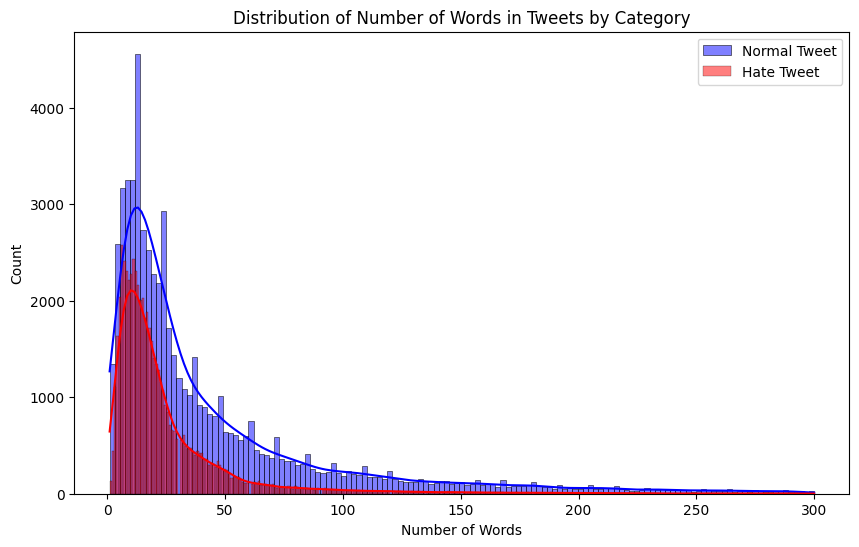

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(data=subset_df[subset_df['Label']==0], x="num_words", color='blue', label='Normal Tweet', kde=True)
sns.histplot(data=subset_df[subset_df['Label']==1], x="num_words", color='red', label='Hate Tweet', kde=True)
plt.legend()
plt.title("Distribution of Number of Words in Tweets by Category")
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.show()

In [26]:
subset_df.isnull().sum()

Content      0
Label        0
num_words    0
dtype: int64

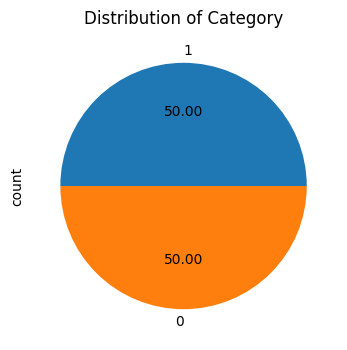

In [28]:
labels_count = subset_df['Label'].value_counts()

plt.figure(figsize=(5, 4))
labels_count.plot(kind='pie', autopct='%1.2f')
plt.title("Distribution of Category")
plt.show()

In [ ]:
subset_df.to_csv("artifacts/final_data.csv", index=False)

## Text Prepocessing

In [ ]:
import pandas as pd
df = pd.read_csv('artifacts/final_data.csv')

In [39]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

In [47]:
# Lower casing
def lower_case(text):
    return text.lower()

# Removing punctuations 
def remove_punctuations(text):
    """Removes all punctuation marks from the given text."""
    exclude = string.punctuation
    return text.translate(str.maketrans("", "", exclude))

In [ ]:
# Removing Stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    text = [word for word in text.split() if word not in stop_words]
    
    return " ".join(text)

In [36]:
# Lemmatizing words
def lemmatization(text):
    lemmtizer = WordNetLemmatizer()
    text_words = text.split()
    text = [lemmtizer.lemmatize(word) for word in text_words]

    return " ".join(text)

In [ ]:
# Preprocessing function
from tqdm import tqdm
def preprocess(df):
    try:
        tqdm.pandas()
        print("Performing lowercasing...")
        df['Content'] = df['Content'].progress_apply(lower_case)

        print("Removing punctuations...")
        df['Content'] = df['Content'].progress_apply(remove_punctuations)

        print("Removing stopwords...")
        df['Content'] = df['Content'].progress_apply(remove_stopwords)
        
        print("\n Performing lemmatization")
        df['Content'] = df['Content'].progress_apply(lemmatization)

        print("\n Finished preprocessing successfully")
        return df
    
    except Exception as e:
        print(f"Error during preprocessing: {e}")
        raise

In [ ]:
norm_df = preprocess(df)
norm_df.head()

Performing lowercasing...


100%|██████████| 120000/120000 [00:00<00:00, 381915.48it/s]


Removing punctuations...


100%|██████████| 120000/120000 [00:01<00:00, 113281.65it/s]


Removing stopwords...


100%|██████████| 120000/120000 [00:46<00:00, 2566.27it/s]



 Performing lemmatization


100%|██████████| 120000/120000 [00:27<00:00, 4403.09it/s]


 Finished preprocessing successfully


,Content,Label,num_words
100185,retweet reject constantly call house threateni...,1,24
97778,purpose whatever attack everyone cannot adhere...,1,16
169017,fucking kidding deserve fucking rot,1,10
132101,retweet racist sexist tired self entitlement,1,17
24015,imagine two million spent security next royal ...,1,18


In [51]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=12, background_color='black')

(-0.5, 499.5, 499.5, -0.5)

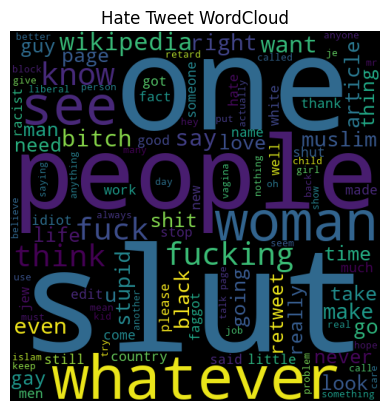

In [54]:
hate_tweet_words = wc.generate(norm_df[norm_df['Label']==1]['Content'].str.cat(sep=' '))
plt.imshow(hate_tweet_words)
plt.title("Hate Tweet WordCloud")
plt.axis('off')

(-0.5, 499.5, 499.5, -0.5)

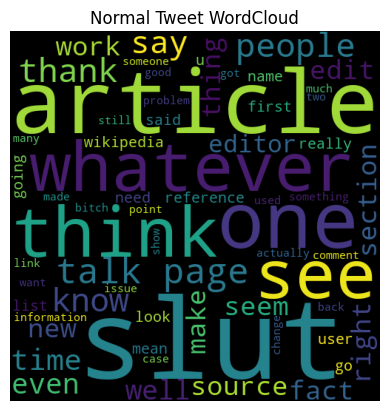

In [53]:
normal_tweet_words = wc.generate(norm_df[norm_df['Label']==0]['Content'].str.cat(sep=' '))
plt.imshow(normal_tweet_words)
plt.title("Normal Tweet WordCloud")
plt.axis('off')

In [55]:
# Shuffle the rows
norm_df = norm_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
norm_df.head()

,Content,Label,num_words
0,notability magnus howie tag placed magnus howi...,0,237
1,big plan,0,2
2,najbolje je idea jean idea drug ako see bird m...,1,16
3,disruptive appear attention seeking remark arg...,1,200
4,reign man really ignorant person perfect examp...,1,19


In [ ]:
norm_df.isnull().sum()

Content      0
Label        0
num_words    0
dtype: int64

In [ ]:
norm_df.to_csv("artifacts/preprocessed_data.csv", index=False)

## Preparing Base Model

In [59]:
import numpy as np
import pandas as pd
df = pd.read_csv("artifacts/preprocessed_data.csv")

In [60]:
df.head()

,Content,Label,num_words
0,notability magnus howie tag placed magnus howi...,0,237
1,big plan,0,2
2,najbolje je idea jean idea drug ako see bird m...,1,16
3,disruptive appear attention seeking remark arg...,1,200
4,reign man really ignorant person perfect examp...,1,19


In [61]:
df['Content'].isnull().sum()

71

In [62]:
df.dropna(how='any', inplace=True)

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [103]:
# Using BOW technique for vocabulary
cv = CountVectorizer(max_features=1000)
X = cv.fit_transform(df['Content'])
y = df['Label'].values.ravel()

In [104]:
X.shape, y.shape

((119929, 1000), (119929,))

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
X_train.shape, y_train.shape

((95943, 1000), (95943,))

In [110]:
import os
from dotenv import load_dotenv
load_dotenv()

uri = os.getenv("MLFLOW_URI")
repo_owner = os.getenv("OWNER")
repo_name = os.getenv("REPO")

In [114]:
import mlflow
import dagshub

if uri is None:
	raise ValueError("MLFLOW_URI environment variable is not set.")
mlflow.set_tracking_uri(uri)

if repo_owner is None:
	raise ValueError("Missing dagshub logging environment credentials.")
dagshub.init(repo_owner=repo_owner, repo_name=repo_name, mlflow=True)

mlflow.set_experiment("BaselineModels Experiment")

Initialized MLflow to track repo "SubinoyBera/Toxic-TweetTagger"

Repository SubinoyBera/Toxic-TweetTagger initialized!

2025/07/13 20:06:20 INFO mlflow.tracking.fluent: Experiment with name 'BaselineModels Experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/6838c1d73673435e8290452bf4d5b720', creation_time=1752417373830, experiment_id='3', last_update_time=1752417373830, lifecycle_stage='active', name='BaselineModels Experiment', tags={}>

In [115]:
with mlflow.start_run(run_name="Logistic Regression-B1"):
    try:
        mlflow.log_param("vectorizer", "Bag-of-Words")
        mlflow.log_param("num_features", 1000)

        model1 = LogisticRegression(solver="lbfgs", max_iter=2500, n_jobs=-1)

        print("Training Logistic Regression model...")
        model1.fit(X_train, y_train)

        mlflow.log_param("LR-B1", model1)

        print("Model training completed. Making evaluating model...")
        y_pred = model1.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1: {f1}")

        print("Logging metrics to MLflow...")
        mlflow.log_metric("accuracy", float(accuracy))
        mlflow.log_metric("precision", float(precision))
        mlflow.log_metric("recall", float(recall))
        mlflow.log_metric("f1", float(f1))
        print("Done!")

    except Exception as e:
        print(f"Error in model training and or tracking: {e}")
        raise e

Training Logistic Regression model...
Model training completed. Making evaluating model...
Accuracy: 0.772075377303427
Precision: 0.7798779963914426
Recall: 0.757552996160908
F1: 0.7685534058676601
Logging metrics to MLflow...
Done!
🏃 View run Logistic Regression-B1 at: https://dagshub.com/SubinoyBera/Toxic-TweetTagger.mlflow/#/experiments/3/runs/cac43a1cb7364e2cb1a86aaca79d4bfa
🧪 View experiment at: https://dagshub.com/SubinoyBera/Toxic-TweetTagger.mlflow/#/experiments/3


In [116]:
with mlflow.start_run(run_name="Logistic Regression-B2"):
    try:
        mlflow.log_param("vectorizer", "Bag-of-Words")
        mlflow.log_param("num_features", 1000)

        model2 = LogisticRegression(solver="saga", penalty='l2', max_iter=2000, n_jobs=-1)

        print("Training Logistic Regression model...")
        model2.fit(X_train, y_train)

        mlflow.log_param("LR-B2", model2)

        print("Model training completed. Making evaluating model...")
        y_pred = model2.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1: {f1}")

        print("Logging metrics to MLflow...")
        mlflow.log_metric("accuracy", float(accuracy))
        mlflow.log_metric("precision", float(precision))
        mlflow.log_metric("recall", float(recall))
        mlflow.log_metric("f1", float(f1))
        print("Done!")

    except Exception as e:
        print(f"Error in model training and or tracking: {e}")
        raise e

Training Logistic Regression model...
Model training completed. Making evaluating model...
Accuracy: 0.7729508880180105
Precision: 0.7800822763112787
Recall: 0.7596394591887832
F1: 0.7697251585623679
Logging metrics to MLflow...
Done!
🏃 View run Logistic Regression-B2 at: https://dagshub.com/SubinoyBera/Toxic-TweetTagger.mlflow/#/experiments/3/runs/f5bbd5da475947edb77e69880f95dc98
🧪 View experiment at: https://dagshub.com/SubinoyBera/Toxic-TweetTagger.mlflow/#/experiments/3


#### Running more expreriments ...

In [119]:
# Increasing vocabulary size to 1500
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(df['Content'])
y = df['Label'].values

In [120]:
X.shape, y.shape

((119929, 1500), (119929,))

In [122]:
from scipy.sparse import hstack, csr_matrix

# Adding extra feature num_words
num_words_col = csr_matrix(df['num_words'].values.reshape(-1, 1))
X = hstack([X, num_words_col])

In [123]:
X.shape

(119929, 1501)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
with mlflow.start_run(run_name="Logistic Regression-B3"):
    try:
        mlflow.log_param("vectorizer", "Bag-of-Words")
        mlflow.log_param("num_features", 1000)

        model3 = LogisticRegression(solver="lbfgs", penalty='l2', max_iter=2000, n_jobs=-1)

        print("Training Logistic Regression model...")
        model3.fit(X_train, y_train)

        mlflow.log_param("LR-B3", model3)

        print("Model training completed. Making evaluating model...")
        y_pred = model3.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1: {f1}")

        print("Logging metrics to MLflow...")
        mlflow.log_metric("accuracy", float(accuracy))
        mlflow.log_metric("precision", float(precision))
        mlflow.log_metric("recall", float(recall))
        mlflow.log_metric("f1", float(f1))
        print("Done!")

    except Exception as e:
        print(f"Error in model training and or tracking: {e}")
        raise e

Training Logistic Regression model...
Model training completed. Making evaluating model...
Accuracy: 0.7845409822396398
Precision: 0.7919952005485087
Recall: 0.7712401936237689
F1: 0.7814799154334038
Logging metrics to MLflow...
Done!
🏃 View run Logistic Regression-B3 at: https://dagshub.com/SubinoyBera/Toxic-TweetTagger.mlflow/#/experiments/3/runs/a69c5633dd5442248871ade489b3788b
🧪 View experiment at: https://dagshub.com/SubinoyBera/Toxic-TweetTagger.mlflow/#/experiments/3


In [126]:
# Increasing vocabulary further
cv = CountVectorizer(max_features=2000)
X = cv.fit_transform(df['Content'])
y = df['Label'].values

In [127]:
num_words_col = csr_matrix(df['num_words'].values.reshape(-1, 1))
X = hstack([X, num_words_col])

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
with mlflow.start_run(run_name="Logistic Regression-B4"):
    try:
        mlflow.log_param("vectorizer", "Bag-of-Words")
        mlflow.log_param("num_features", 2000)

        model4 = LogisticRegression(solver="lbfgs", penalty='l2', max_iter=2000, C=0.1, n_jobs=-1)

        print("Training Logistic Regression model...")
        model4.fit(X_train, y_train)

        mlflow.log_param("LR-B4", model4)

        print("Model training completed. Making evaluating model...")
        y_pred = model4.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1: {f1}")

        print("Logging metrics to MLflow...")
        mlflow.log_metric("accuracy", float(accuracy))
        mlflow.log_metric("precision", float(precision))
        mlflow.log_metric("recall", float(recall))
        mlflow.log_metric("f1", float(f1))
        print("Done!")

    except Exception as e:
        print(f"Error in model training and or tracking: {e}")
        raise e

Training Logistic Regression model...
Model training completed. Making evaluating model...
Accuracy: 0.7969648961894439
Precision: 0.8014070181386675
Recall: 0.7891003171423803
F1: 0.795206055508831
Logging metrics to MLflow...
Done!
🏃 View run Logistic Regression-B4 at: https://dagshub.com/SubinoyBera/Toxic-TweetTagger.mlflow/#/experiments/3/runs/ee5df55922be46c1871299f03a1e46ed
🧪 View experiment at: https://dagshub.com/SubinoyBera/Toxic-TweetTagger.mlflow/#/experiments/3


In [133]:
cv = CountVectorizer(max_features=2000)
X = cv.fit_transform(df['Content'])
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
with mlflow.start_run(run_name="Logistic Regression-B5"):
    try:
        mlflow.log_param("vectorizer", "Bag-of-Words")
        mlflow.log_param("num_features", 2000)

        model5 = LogisticRegression(solver="lbfgs", penalty='l2', max_iter=2000, C=0.1, n_jobs=-1)

        print("Training Logistic Regression model...")
        model5.fit(X_train, y_train)

        mlflow.log_param("LR-B5", model5)

        print("Model training completed. Making evaluating model...")
        y_pred = model5.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1: {f1}")

        print("Logging metrics to MLflow...")
        mlflow.log_metric("accuracy", float(accuracy))
        mlflow.log_metric("precision", float(precision))
        mlflow.log_metric("recall", float(recall))
        mlflow.log_metric("f1", float(f1))
        print("Done!")

    except Exception as e:
        print(f"Error in model training and or tracking: {e}")
        raise e

Training Logistic Regression model...
Model training completed. Making evaluating model...
Accuracy: 0.7971316601350787
Precision: 0.8017811704834605
Recall: 0.7889334001001502
F1: 0.7953054013124684
Logging metrics to MLflow...
Done!
🏃 View run Logistic Regression-B5 at: https://dagshub.com/SubinoyBera/Toxic-TweetTagger.mlflow/#/experiments/3/runs/ad0043d02b8e491d87f9b91e47c60a43
🧪 View experiment at: https://dagshub.com/SubinoyBera/Toxic-TweetTagger.mlflow/#/experiments/3


In [131]:
%cd ..

d:\My Projects\Toxic Tagger


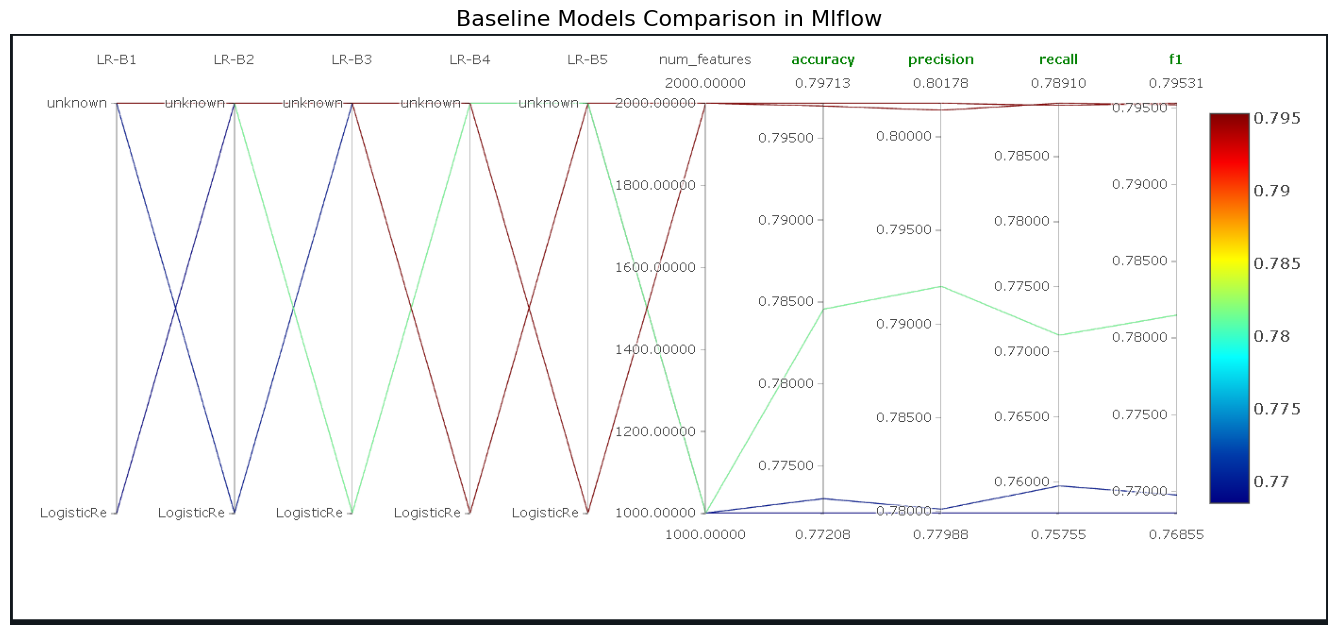

In [135]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("images/base_models_comparison.png")
plt.figure(figsize=(17, 13))
plt.imshow(img)
plt.title("Baseline Models Comparison in Mlflow", fontsize=16, color='black')
plt.axis('off')
plt.show()

Therefore, model evaluations metrics increases with increase in the size of vacabulary created using the Bag of Words technique. Also the effect of adding the "num_words" feature does not have any major improvement in model performance as to the effect of increasing the vocabulary size.